**Image Classification**

This project classifies different images using opensource library called Tensorflow and dataset of CiFAR-10 inaddition with CNN


**Import Libraries**

In [36]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix



Load and preprocess CiFAR-10 dataset


In [37]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



Normalize pixel values

In [38]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



Verify data

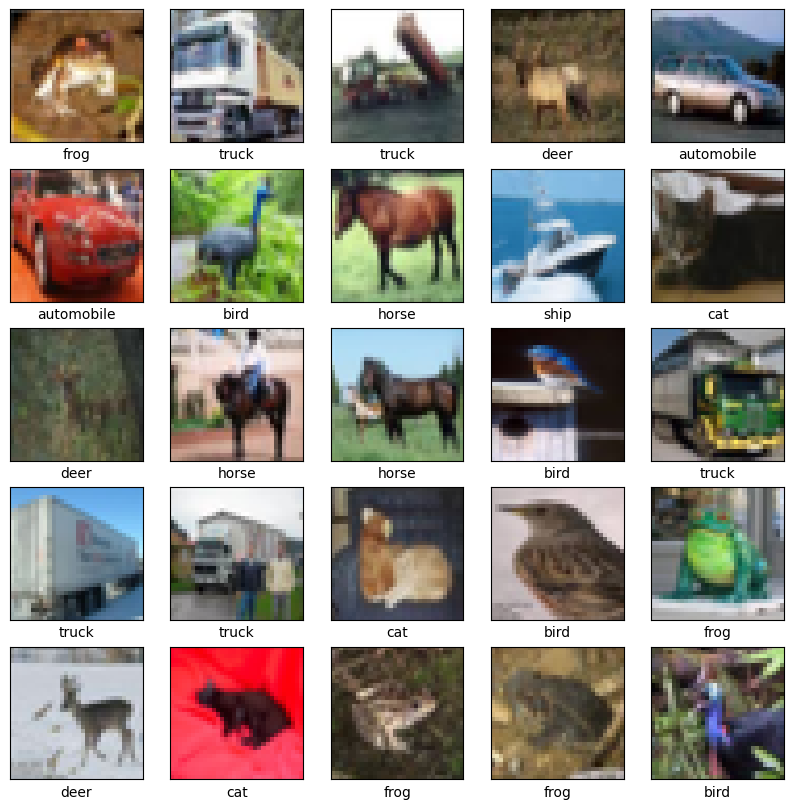

In [39]:
# Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()




From the above results seen different images for image classification

In [40]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [41]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



Compile the model

In [42]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])






Train the model

In [43]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))




Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5450 - accuracy: 0.4374 - val_loss: 1.2520 - val_accuracy: 0.5556
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1729 - accuracy: 0.5839 - val_loss: 1.0875 - val_accuracy: 0.6068
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0264 - accuracy: 0.6381 - val_loss: 1.0104 - val_accuracy: 0.6438
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9225 - accuracy: 0.6774 - val_loss: 1.0327 - val_accuracy: 0.6382
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8540 - accuracy: 0.7014 - val_loss: 0.9364 - val_accuracy: 0.6730
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7920 - accuracy: 0.7256 - val_loss: 0.8919 - val_accuracy: 0.6902
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7462 - accuracy: 0.7365 - val_loss: 0.8577 -

Evaluate the model

In [44]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")





313/313 - 3s - loss: 0.8799 - accuracy: 0.7098 - 3s/epoch - 10ms/step

Test accuracy: 0.7098000049591064


Plotting the results for image classification

In [45]:
# Plot training history
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

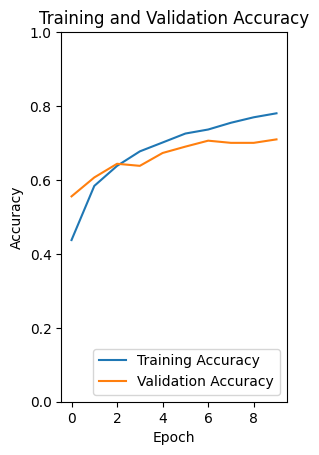

In [46]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')



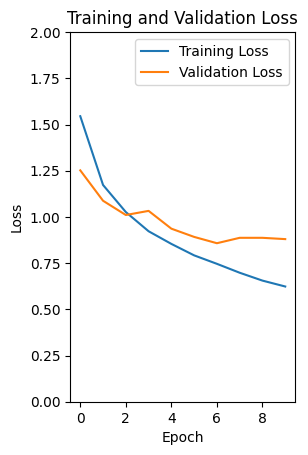

In [47]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()



Prediction on Single image and showcasing results

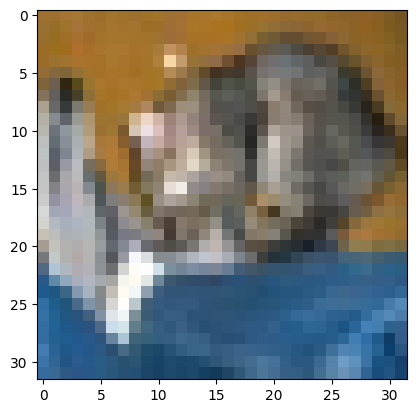

1/1 [==============================] - 0s 84ms/step
Predicted label: cat
True label: cat


In [48]:
# Predict on a single image
img_index = 0
img = test_images[img_index]
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0)  # Add the batch dimension
predictions = model.predict(img)
predicted_label = np.argmax(predictions)
print(f"Predicted label: {class_names[predicted_label]}")
print(f"True label: {class_names[test_labels[img_index][0]]}")


313/313 [==============================] - 5s 15ms/step


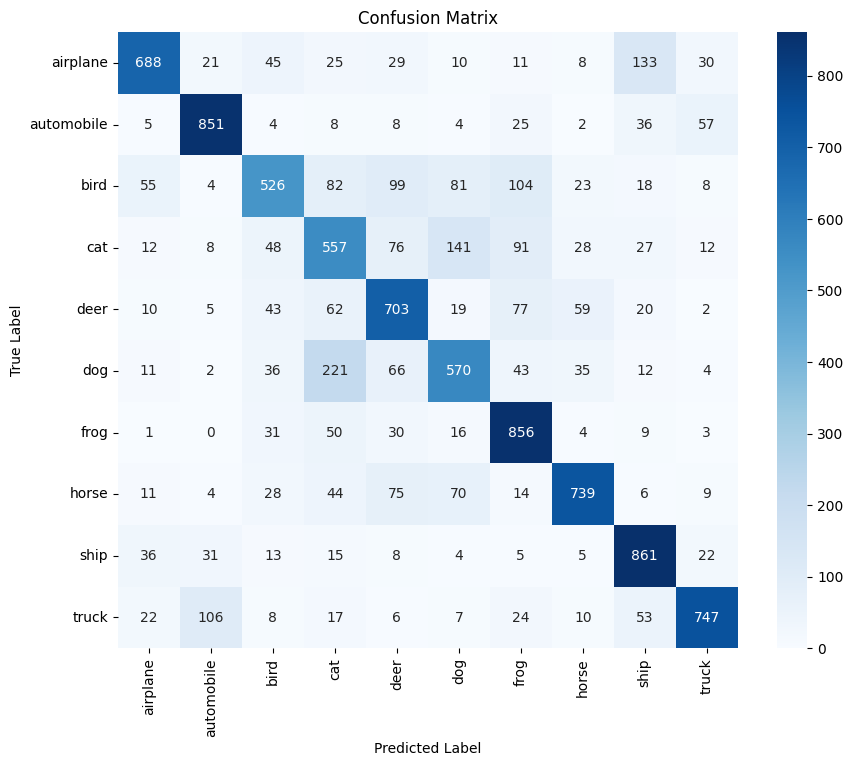

In [49]:
# Confusion Matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
